In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.special

np.random.seed(42)

##Planning a telescope observation

In [ ]:
def markov_chain(states, transition_probs, start_state, N):
  history = [start_state]

  state = start_state
  for i in range(N):
    state = np.random.choice(states, p=transition_probs[state])
    history.append(str(state))

  return history

In [ ]:
def traceplot(history, obj='sunny'):
  x = [n for n in range(1,N)]
  y = [(history[:n].count(obj))/n for n in range(1,N)]

  plt.plot(x,y)
  plt.xlabel('N')
  plt.ylabel('proportion')

  return y

In [ ]:
def histogram(y):
  plt.hist(y, density=True, bins=len(y))
  plt.ylabel('probability')

###Climate example

In [ ]:
states = ['sunny', 'rainy']
transition_probs = {'sunny' : [0.9, 0.1],
                    'rainy': [0.5, 0.5]}
start_state = 'rainy'
N = 10000

history = markov_chain(states, transition_probs, start_state, N)

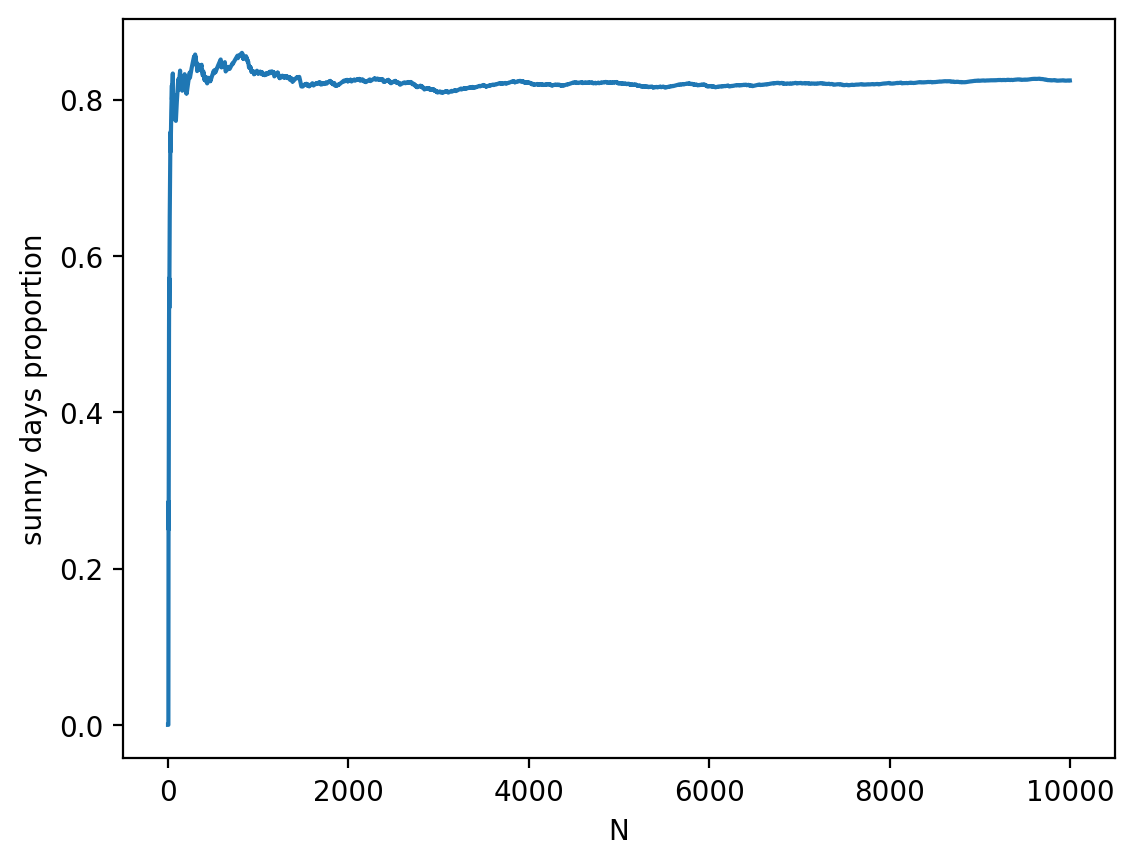

In [ ]:
y = traceplot(history)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.2857142857142857, 0.25, 0.3333333333333333, 0.4, 0.45454545454545453, 0.5, 0.5384615384615384, 0.5714285714285714, 0.5333333333333333, 0.5625, 0.5882352941176471, 0.6111111111111112, 0.631578947368421, 0.65, 0.6666666666666666, 0.6818181818181818, 0.6956521739130435, 0.7083333333333334, 0.72, 0.7307692307692307, 0.7407407407407407, 0.75, 0.7586206896551724, 0.7333333333333333, 0.7419354838709677, 0.75, 0.7575757575757576, 0.7647058823529411, 0.7714285714285715, 0.7777777777777778, 0.7837837837837838, 0.7894736842105263, 0.7948717948717948, 0.8, 0.8048780487804879, 0.8095238095238095, 0.813953488372093, 0.8181818181818182, 0.8, 0.8043478260869565, 0.8085106382978723, 0.8125, 0.8163265306122449, 0.82, 0.8235294117647058, 0.8269230769230769, 0.8301886792452831, 0.8333333333333334, 0.8181818181818182, 0.8035714285714286, 0.7894736842105263, 0.7758620689655172, 0.7796610169491526, 0.7833333333333333, 0.7868852459016393, 0.7903225806451613, 0.

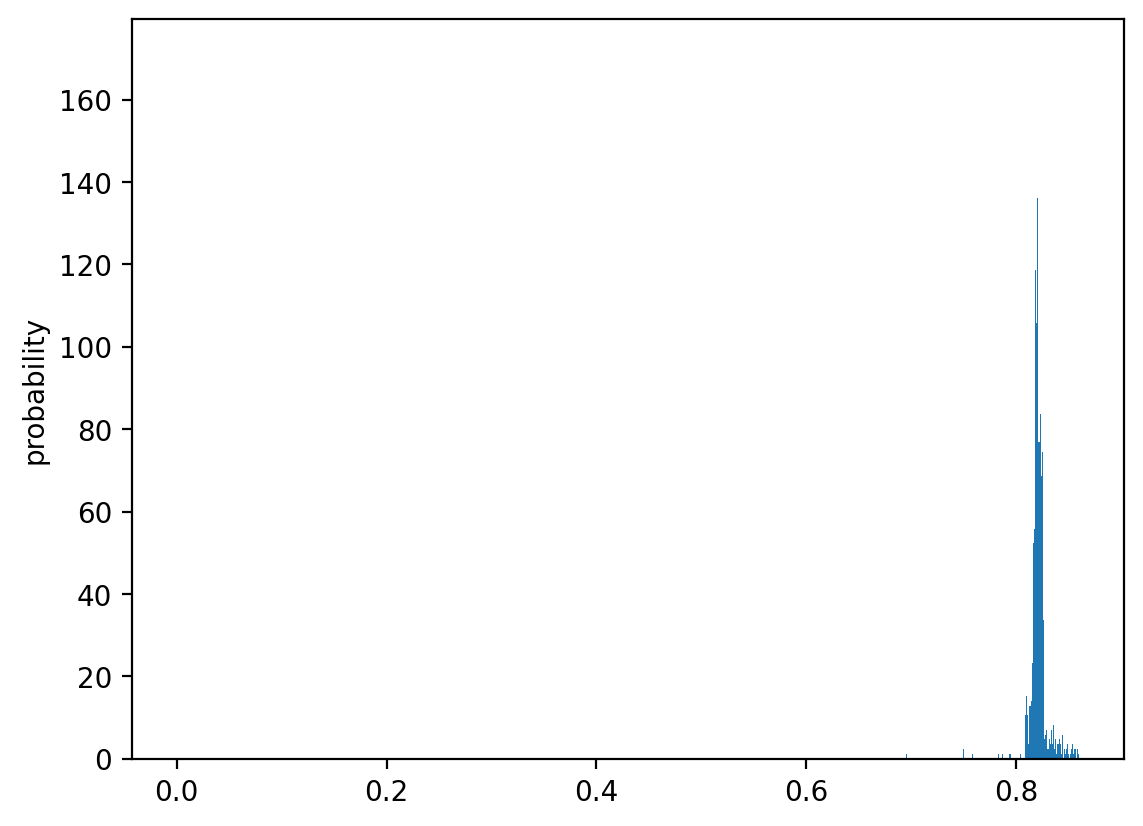

In [ ]:
histogram(y)

Now I plot the histogram without considering the first 2000 iterations in order to discard the settling phase of the process

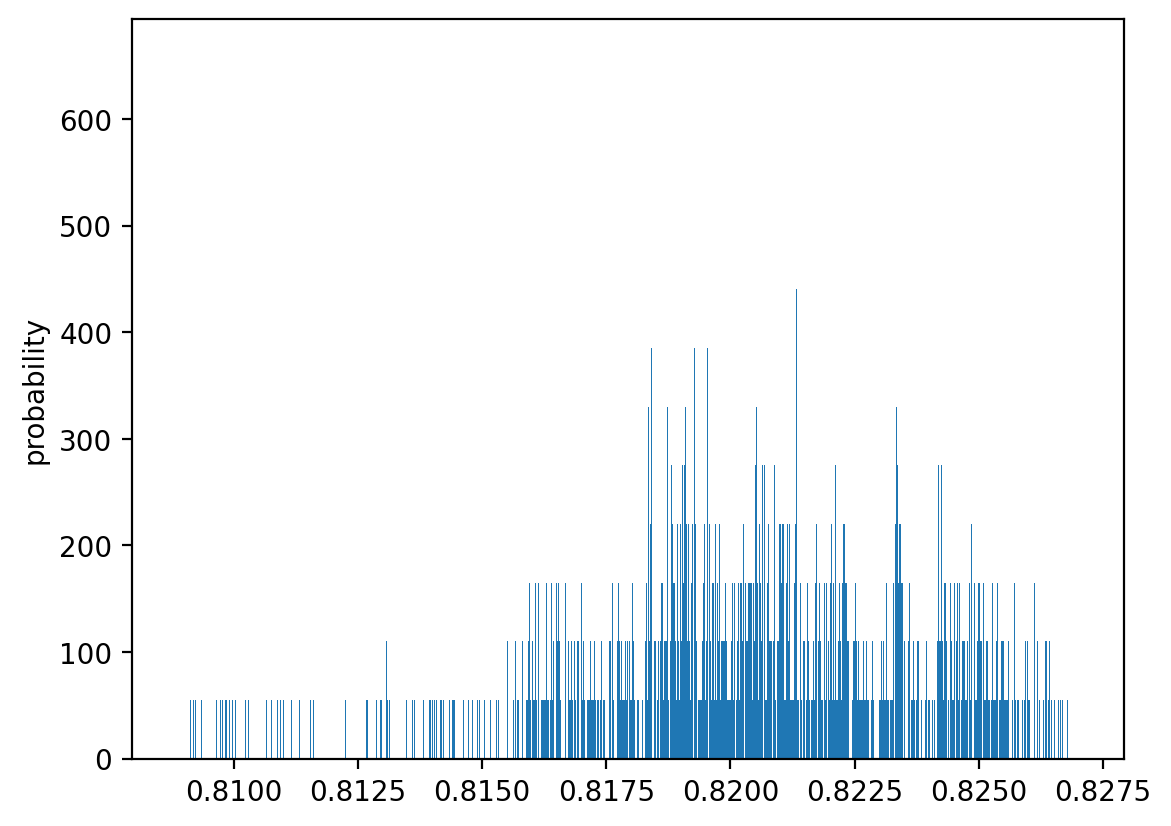

In [ ]:
histogram(y[2000:])

###Economic example

In [ ]:
ec_states = ['bull', 'bear', 'stagnant']
ec_transition_probs = {'bull' : [0.9, 0.075, 0.025],
                    'bear': [0.15, 0.8, 0.05],
                    'stagnant' : [0.25, 0.25, 0.5]}
ec_start_state = 'bull'
N = 10000

ec_history = markov_chain(ec_states, ec_transition_probs, ec_start_state, N)

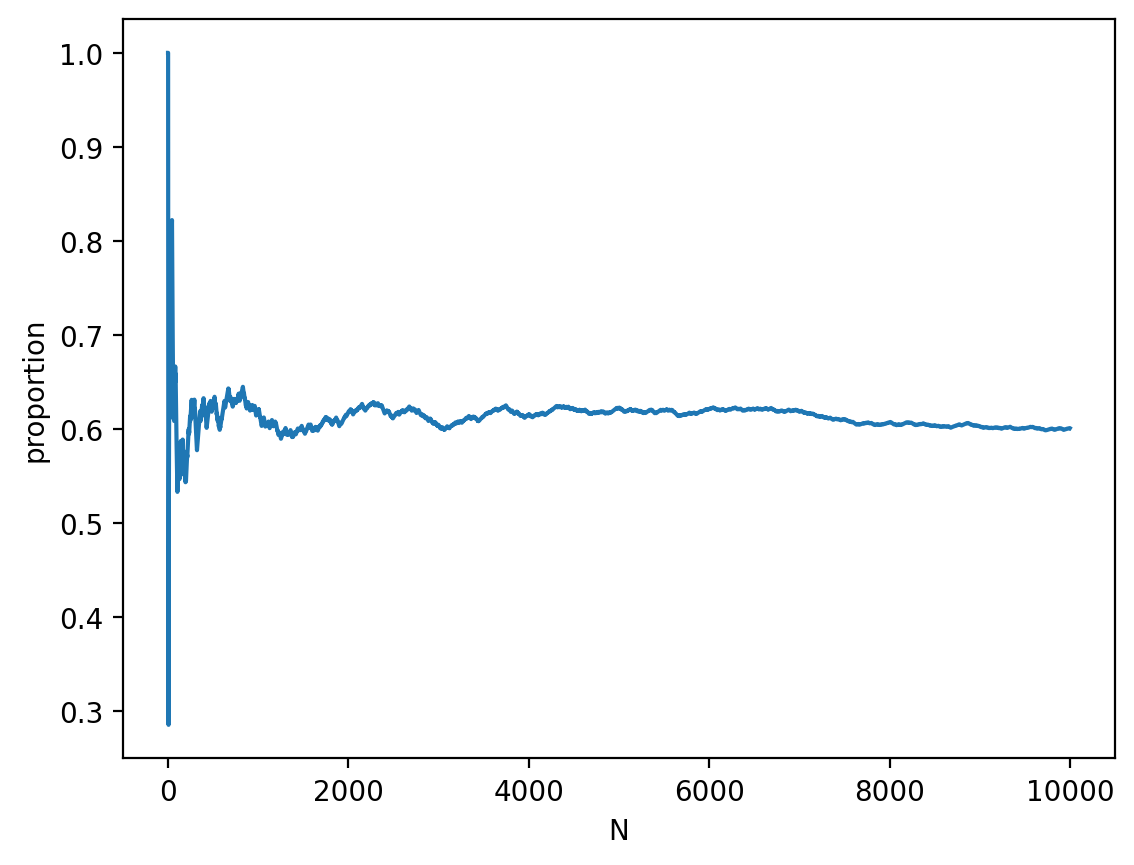

In [ ]:
ec_y = traceplot(ec_history, obj='bull')

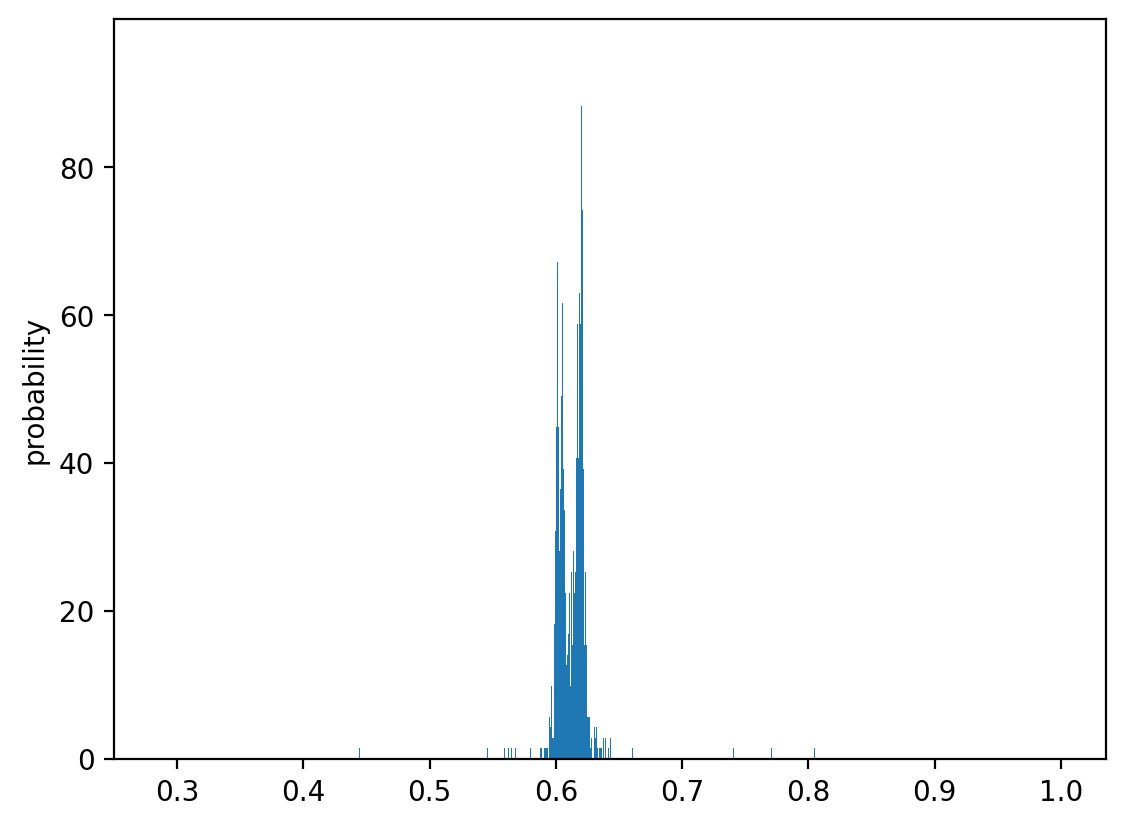

In [ ]:
histogram(ec_y)

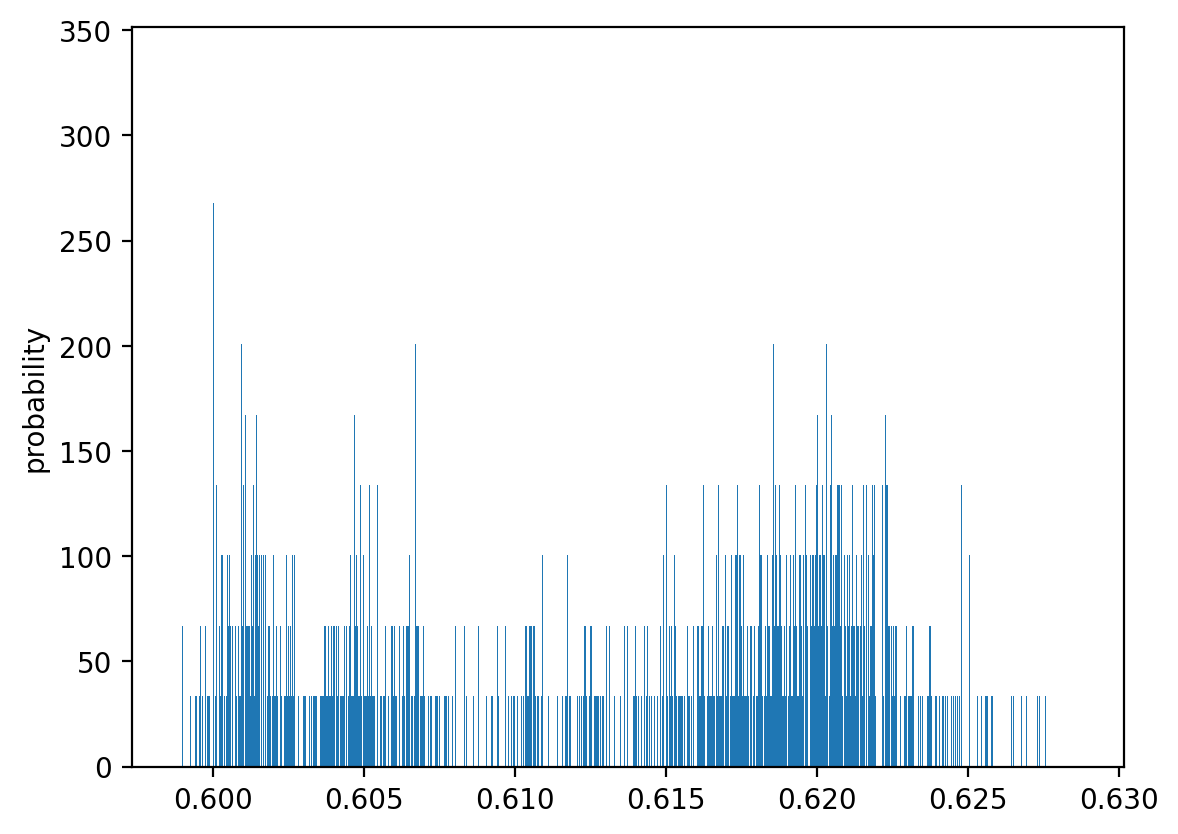

In [ ]:
histogram(ec_y[2000:])

##Balls in many dimensions

In [ ]:
def hypersphere_V(N, num_samples=1000000):
  points = np.random.uniform(0, 1, size=(num_samples, N))
  in_points = np.linalg.norm(points, axis=1) <= 1

  in_count = np.sum(in_points)

  return (2**N)*in_count/num_samples

In [ ]:
hypersphere_V(2)

np.float64(3.14022)

Text(0, 0.5, 'volume')

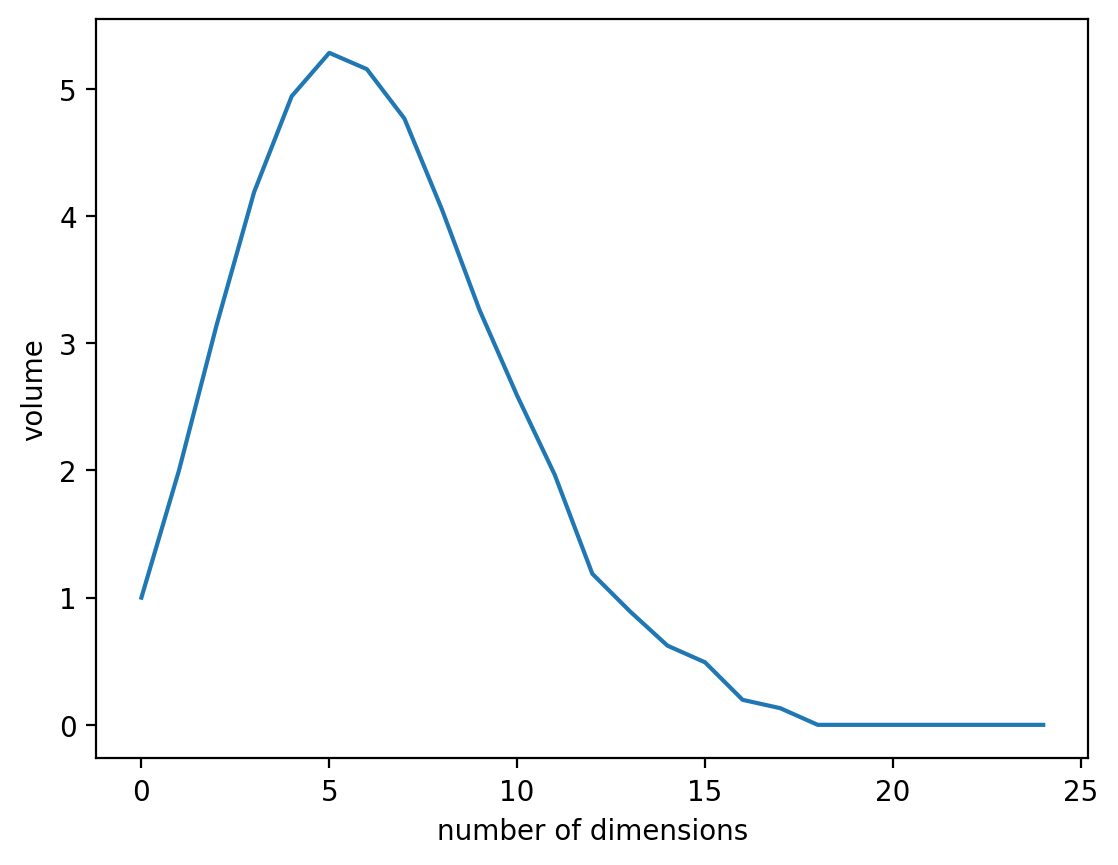

In [ ]:
dims = [i for i in range(25)]
volumes = [hypersphere_V(i) for i in dims]

plt.plot(dims, volumes)
plt.xlabel('number of dimensions')
plt.ylabel('volume')

<ipython-input-140-cf066911402e>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


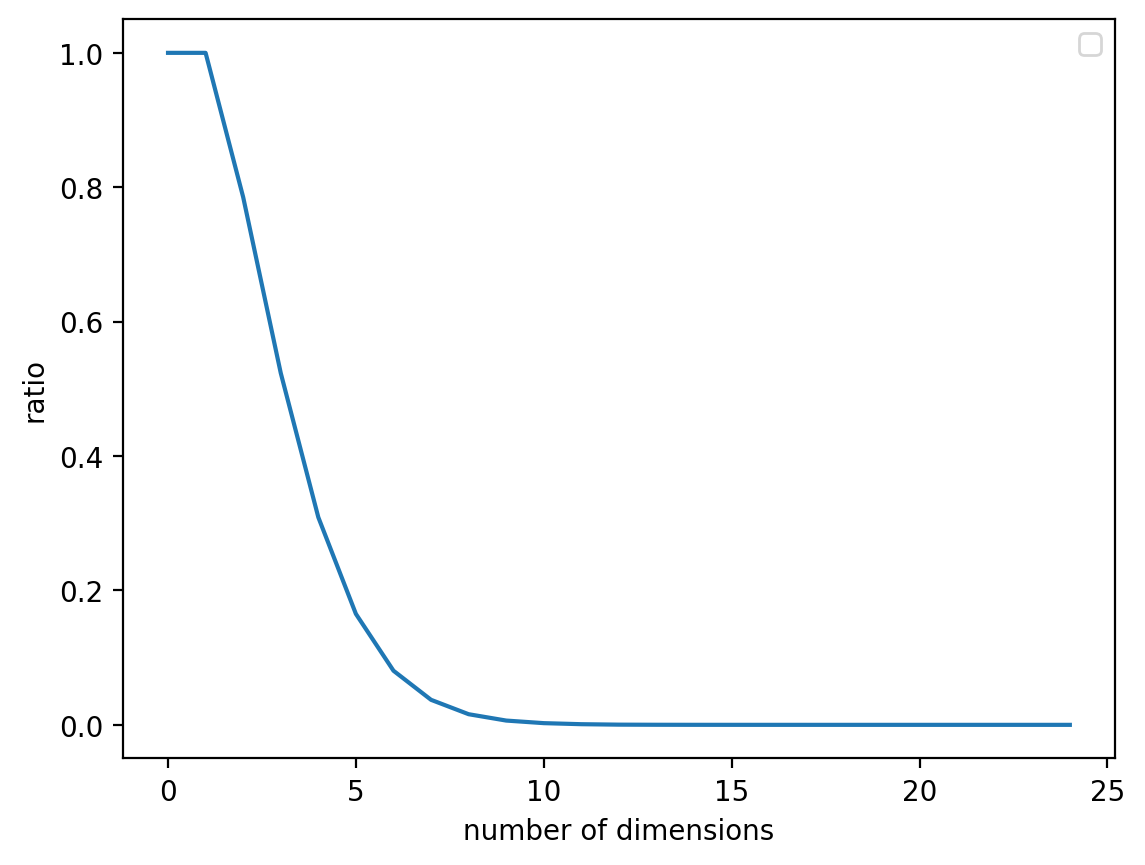

In [ ]:
cube_volumes = [(2**i) for i in dims]
ratios = [volumes[i]/cube_volumes[i] for i in range(len(dims))]

plt.plot(dims, ratios)
plt.xlabel('number of dimensions')
plt.ylabel('ratio')
plt.legend()


In [ ]:
def analytic_volume(N):
  return np.pi**(N/2)/scipy.special.gamma(N/2 + 1)

In [ ]:
analytic_volumes = [analytic_volume(i) for i in dims]

Text(0, 0.5, 'volume')

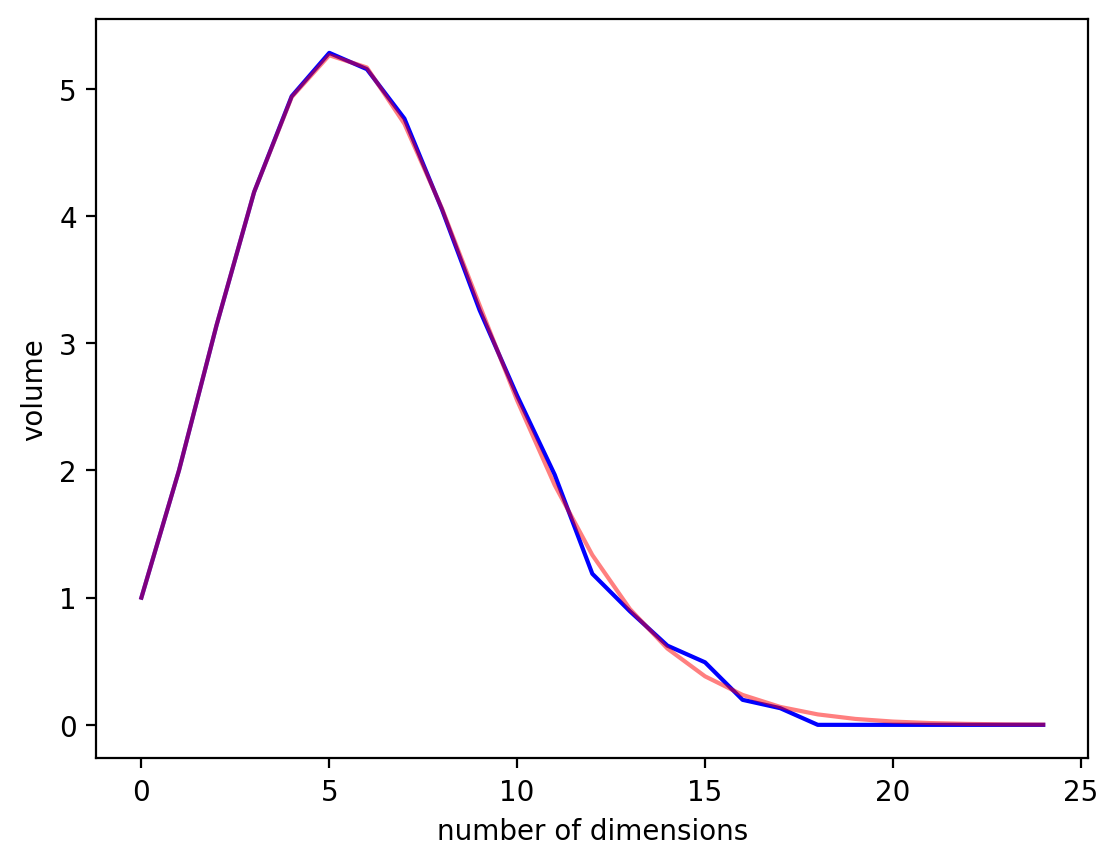

In [ ]:
plt.plot(dims, volumes, color='blue')
plt.plot(dims, analytic_volumes, color='red', alpha=0.5)
plt.xlabel('number of dimensions')
plt.ylabel('volume')

Text(0, 0.5, 'difference in volumes')

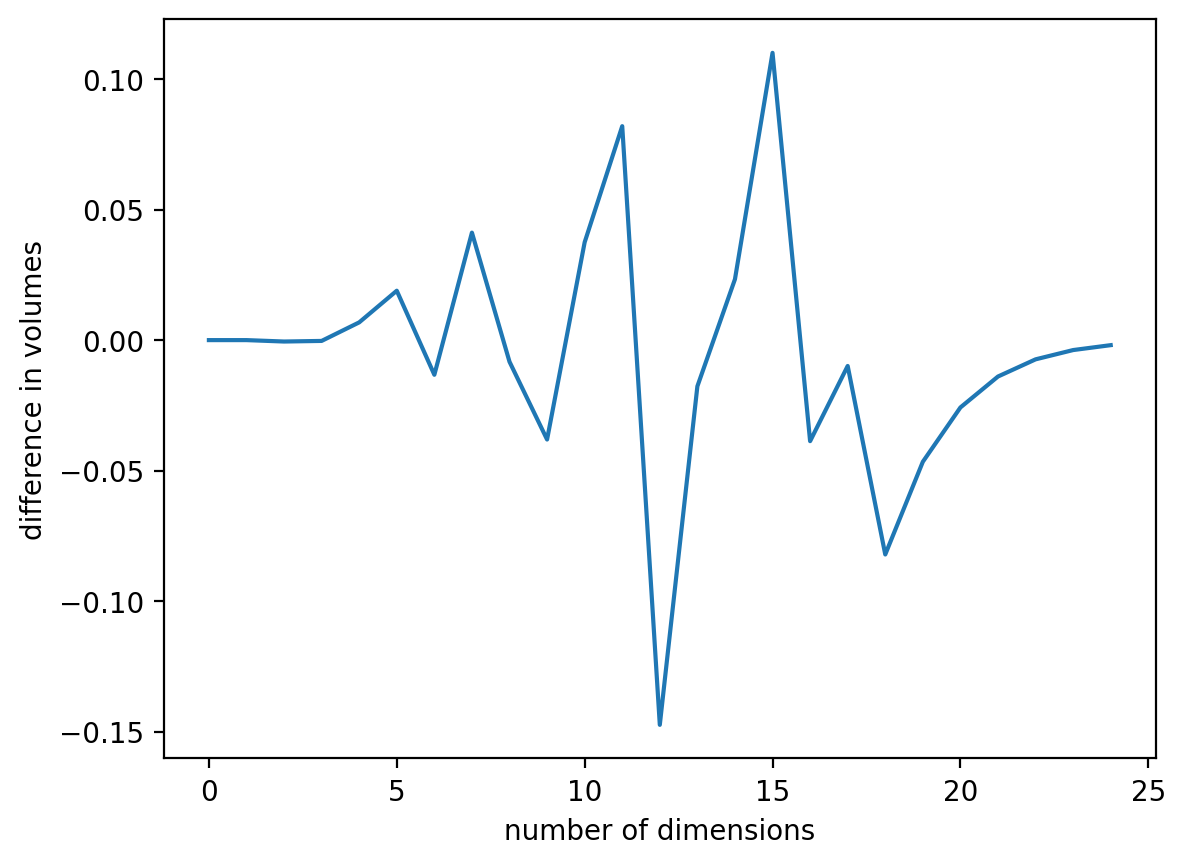

In [ ]:
differences = [volumes[i]-analytic_volumes[i] for i in range(len(dims))]
plt.plot(dims, differences)
plt.xlabel('number of dimensions')
plt.ylabel('difference in volumes')

Now I fix the number of dimension N (e.g N=5) to study the error in the
numerical computation of the hyoersphere volume with respect to the number of iterations

Text(0, 0.5, 'difference in volumes')

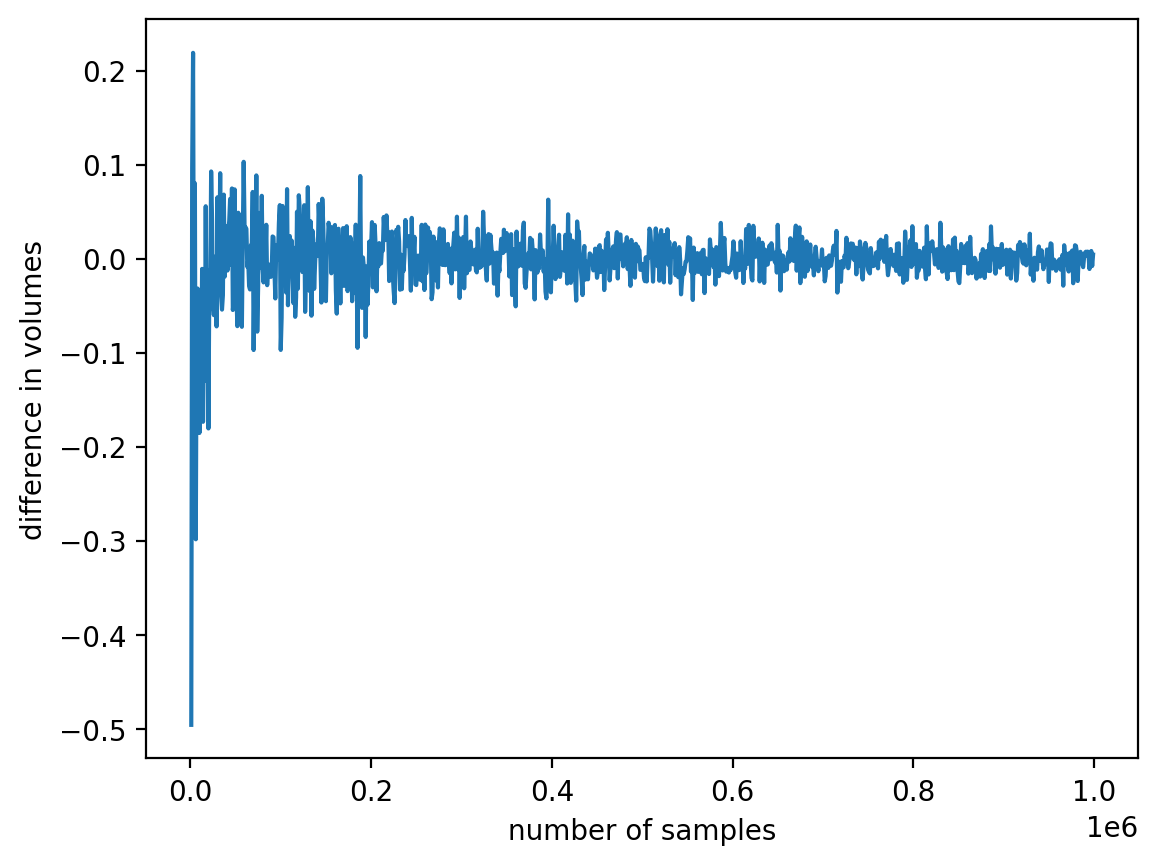

In [ ]:
N = 5
nums_samples = [i for i in range(1000, 1000000, 1000)]
ball_volumes = [hypersphere_V(N, i) for i in nums_samples]
analytic_ball_volume = analytic_volume(N)

diffs = [ball_v - analytic_ball_volume for ball_v in ball_volumes]

plt.plot(nums_samples, diffs)
plt.xlabel('number of samples')
plt.ylabel('difference in volumes')